# sklearn version

In [1]:
import os
if  not 'juxtorpus' in os.listdir():
    os.chdir('../../')
assert 'juxtorpus' in os.listdir(), f"Working directory should be at juxtorpus. But at {os.getcwd()}"
f"Working directory: {os.getcwd()}"

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings('ignore')

In [2]:
from juxtorpus.corpus import CorpusBuilder, Corpus
builder = CorpusBuilder('/Users/hcha9747/Downloads/widgets/Sample_Auspol_Tweets.csv')
builder.set_text_column('text')
corpus = builder.build()

In [3]:
from juxtorpus.corpus.topic_model import LDA

lda = LDA(corpus, num_topics=10)
lda.build('tf').widget()

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9      0.063118 -0.003473       1        1  12.811820
8      0.136925 -0.044205       2        1  12.702444
6      0.007288  0.024992       3        1  11.998731
3     -0.022197  0.027649       4        1  10.926648
0     -0.101498  0.085122       5        1  10.822481
1     -0.100887  0.107139       6        1  10.372456
2      0.074221 -0.004103       7        1   9.633512
7      0.027325  0.032033       8        1   7.658065
5      0.112994 -0.060716       9        1   7.437117
4     -0.197289 -0.164439      10        1   5.636727, topic_info=              Term          Freq         Total Category  logprob  loglift
21837        https  21702.000000  21702.000000  Default  30.0000  30.0000
10842           co  21750.000000  21750.000000  Default  29.0000  29.0000
35533       porter    845.000000    845.000000  Default  28.0000  28.0000
8674   bruce_haigh   2547.000000   2547.000000  Default  27.0000  27.0000
30394     morrison   7085.000000   7085.000000  Default  26.0000  26.0000
...            ...           ...           ...      ...      ...      ...
23127     insiders    152.744441   1380.271920  Topic10  -5.4796   0.6746
49891        would    142.233817   1055.708641  Topic10  -5.5509   0.8714
47247           us    143.579055   1265.699716  Topic10  -5.5415   0.6994
4958           amp    147.368533   1879.806034  Topic10  -5.5155   0.3299
27323         like    138.316059   1371.508876  Topic10  -5.5789   0.5817

[794 rows x 6 columns], token_table=       Topic      Freq  Term
term                        
0          4  0.115763     0
0          7  0.042096     0
0          8  0.831391     0
2          1  0.022459   000
2          3  0.089835   000
...      ...       ...   ...
51639      4  0.265472  zero
51639      6  0.599208  zero
51639      7  0.026547  zero
51639      8  0.003792  zero
51639     10  0.053094  zero

[2161 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 9, 7, 4, 1, 2, 3, 8, 6, 5])

In [4]:
lda.add_results_to_corpus()

corpus.meta

{'#lda_topic_0': <SeriesMeta [Id: #lda_topic_0]>,
 '#lda_topic_1': <SeriesMeta [Id: #lda_topic_1]>,
 '#lda_topic_2': <SeriesMeta [Id: #lda_topic_2]>,
 '#lda_topic_3': <SeriesMeta [Id: #lda_topic_3]>,
 '#lda_topic_4': <SeriesMeta [Id: #lda_topic_4]>,
 '#lda_topic_5': <SeriesMeta [Id: #lda_topic_5]>,
 '#lda_topic_6': <SeriesMeta [Id: #lda_topic_6]>,
 '#lda_topic_7': <SeriesMeta [Id: #lda_topic_7]>,
 '#lda_topic_8': <SeriesMeta [Id: #lda_topic_8]>,
 '#lda_topic_9': <SeriesMeta [Id: #lda_topic_9]>}

In [5]:
corpus.meta['#lda_topic_0'].summary()

,dtype,sample,top,top_freq,uniqs,num_uniqs,mean,std,min,25%,50%,75%,max
#lda_topic_0,float64,0.008334,0.050017198147637665,457,"0.008334480898410757, 0.007144824741518263, 0....",34096,0.099897,0.224858,0.001539,0.006668,0.009092,0.016668,0.983018


In [6]:
corpus_01 = corpus.slicer.filter_by_range('#lda_topic_0', min_=0.2).slicer.filter_by_range('#lda_topic_3', min_=0.2)
corpus_01.summary()

Corpus Type                                                   Corpus
No. Documents                                                    669
No. Terms                                                      17696
Vocabulary size                                                 3763
No. Terms mean                                              26.45142
No. Terms std                                              13.870966
No. Terms min                                                    4.0
No. Terms 25%                                                   16.0
No. Terms 50%                                                   21.0
No. Terms 75%                                                   39.0
No. Terms max                                                   59.0
metas              #lda_topic_0, #lda_topic_1, #lda_topic_2, #lda...
dtype: object

In [7]:
from juxtorpus.corpus.app import App

app = App()

In [8]:
app['auspol'] = corpus

In [9]:
app.corpus_registry()

GridBox(children=(VBox(children=(HBox(children=(Label(value='Corpus ID', layout=Layout(display='flex', justify…

In [10]:
app.corpus_slicer()

In [12]:
from juxtorpus import Jux

jux = Jux(app['t2'], app['t6'])

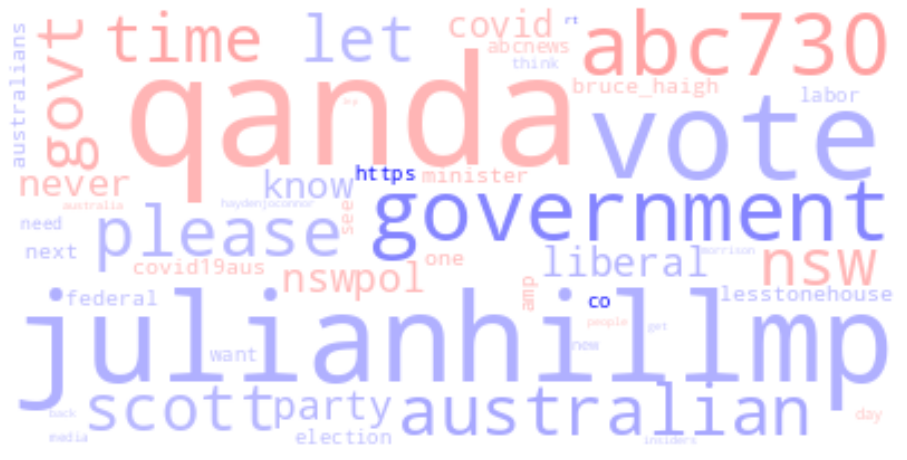

In [15]:
jux.polarity.wordcloud(mode='tf', tokeniser_func=None)

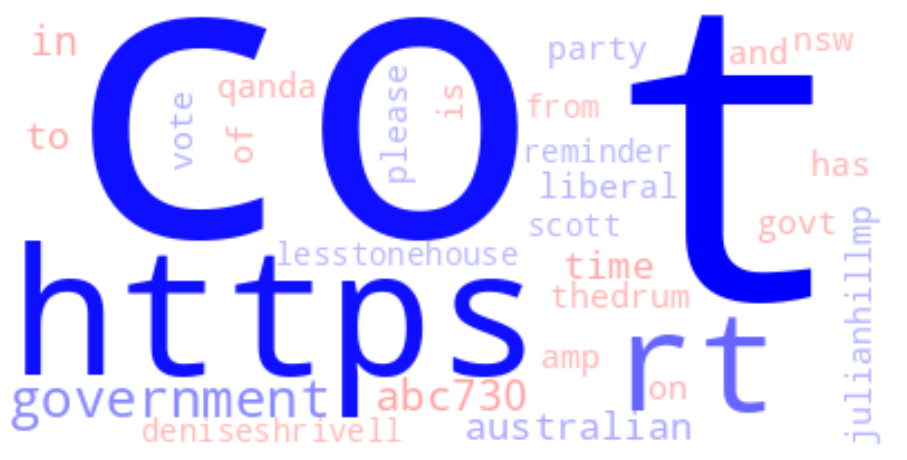

In [16]:
jux.polarity.wordcloud(mode='tfidf')

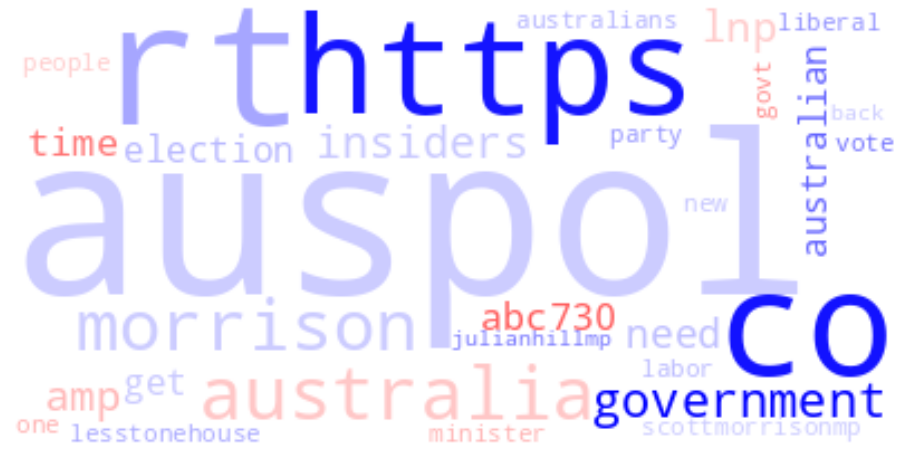

In [17]:
jux.polarity.wordcloud(mode='log_likelihood')